<a href="https://colab.research.google.com/github/sabill/dphi-boothcamp-ml/blob/main/Sabila_Hadinnisa_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Load the data
Display the first 5 rows of the data after loading.

In [55]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

Data Description

age: Age in years
sex: 1 = male, 0 = female ---
cp: Chest pain type ---
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)---
chol: serum cholesterol in mg/dl---
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)---
restecg: Resting electrocardiographic results---
thalach: Maximum heart rate achieved---
exang: Exercise induced angina (1 = yes; 0 = no)---
oldpeak: ST depression induced by exercise relative to rest---
slope: The slope of the peak exercise ST segment---
ca: Number of major vessels (0-4) colored by fluoroscopy---
thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found---
target: 1 = Heart disease present, 0 = Heart disease not present---

<function matplotlib.pyplot.show>

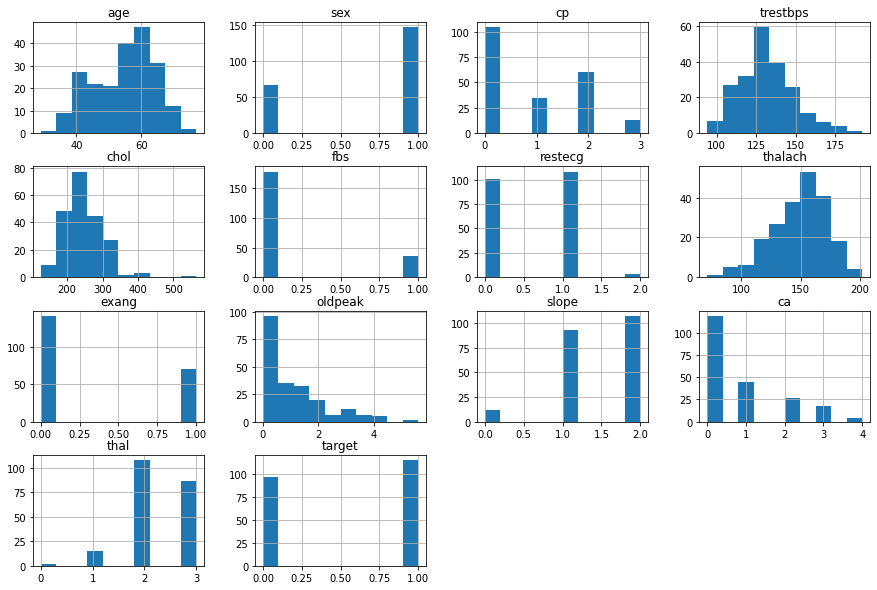

In [56]:
heart_data.hist(figsize=(15,10))
plt.show

In [57]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [58]:
print('Total number of patient: ', len(heart_data))
print('Total heart disease present: ', len(heart_data[heart_data['target']==1]))

Total number of patient:  212
Total heart disease present:  115


In [59]:
heart_data.groupby(['sex','target'])['target'].count()

sex  target
0    0         18
     1         48
1    0         79
     1         67
Name: target, dtype: int64

In [60]:
print('% of male who present', 100*np.mean(heart_data['target'][heart_data['sex'] == 1]))
print('% of female who present', 100*np.mean(heart_data['target'][heart_data['sex'] == 0]))

% of male who present 45.89041095890411
% of female who present 72.72727272727273


In [61]:
heart_data.groupby(['cp','target'])['target'].count()

cp  target
0   0         76
    1         28
1   0          7
    1         28
2   0         11
    1         49
3   0          3
    1         10
Name: target, dtype: int64

## Separate the Input and Target Features of the data

In [62]:
data_X = heart_data.drop(columns='target', axis=1)
data_y = heart_data.target

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(169, 13) (43, 13) (169,) (43,)


## Scale your data if required

In [73]:
# scale = StandardScaler()
# X = X_train[['age', 'trestbps',	'chol',	'thalach', 'oldpeak']]
# scaled_X = scale.fit_transform(X)

# scaled = pd.DataFrame(scaled_X,index=X_train.index, columns=['age_s', 'trestbps_s',	'chol_s',	'thalach_s', 'oldpeak_s'])
# scaled.head()

In [74]:
# X = X_train.join(scaled)
# X.head()

In [75]:
# X.drop(columns=['age', 'trestbps',	'chol',	'thalach', 'oldpeak'], inplace=True)
# X.head()

# Task 2

## Build a Logistic Regression Model on train set

In [79]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict_y = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test,predict_y)
print('Logistic regression accuracy: ', accuracy*100, '%')

Logistic regression accuracy:  86.04651162790698 %


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Evaluate the model using F1 Score

In [80]:
f1_score = sklearn.metrics.f1_score(y_test, predict_y)
print('F1 score: ', f1_score*100, '%')

F1 score:  86.36363636363636 %


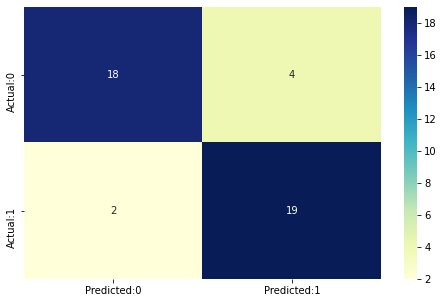

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,predict_y)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [29]:
!pip install shap

     |████████████████████████████████| 327kB 8.9MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463889 sha256=f3482e28ebf3add704a570c810b05705df85287c329fe8341babfe7ded664589
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [42]:
import shap

In [102]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [103]:
pd.DataFrame(shap_values, columns=X_test.columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.097288,-0.276292,-0.795662,0.343342,-0.037910,0.06384,1.169156,-0.256110,0.358979,-1.311976,-0.958199,-1.367009,1.255522
1,0.273376,-0.276292,0.186637,-0.565388,0.004303,0.06384,0.296651,-0.741628,-0.837619,0.330794,-0.306363,-1.367009,1.255522
2,0.097288,-0.276292,-0.795662,0.619912,0.011339,0.06384,0.296651,0.132304,0.358979,0.293459,0.345473,-0.223068,-0.706231
3,0.141310,-0.276292,-0.795662,-0.269063,-0.016803,0.06384,-0.575853,-0.207559,-0.837619,-0.714605,-0.306363,-0.795038,-0.706231
4,0.207343,0.614972,-0.795662,-0.367838,-0.090091,0.06384,-0.575853,0.083752,0.358979,-1.162633,-0.306363,-1.367009,-0.706231


In [104]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,58,1,0,114,318,0,2,140,0,4.4,0,3,1
191,66,1,1,160,246,0,1,120,1,0.0,1,3,1
147,58,1,0,100,234,0,1,156,0,0.1,2,1,3
209,60,1,0,145,282,0,0,142,1,2.8,1,2,3
169,63,0,0,150,407,0,0,154,0,4.0,1,3,3


In [105]:
print(y_test.iloc[0], predict_y[0])
print(y_test.iloc[1], predict_y[1])
# print(y_test.iloc[3], predict_y[3])


0 0
0 0


In [106]:
explainer.expected_value

0.3806854600640716

In [107]:
shap_values

array([[ 9.72884039e-02, -2.76291982e-01, -7.95661670e-01,
         3.43342106e-01, -3.79102955e-02,  6.38401462e-02,
         1.16915564e+00, -2.56110474e-01,  3.58979369e-01,
        -1.31197608e+00, -9.58199062e-01, -1.36700861e+00,
         1.25552247e+00],
       [ 2.73376013e-01, -2.76291982e-01,  1.86636688e-01,
        -5.65388439e-01,  4.30345761e-03,  6.38401462e-02,
         2.96651431e-01, -7.41627961e-01, -8.37618528e-01,
         3.30794198e-01, -3.06362965e-01, -1.36700861e+00,
         1.25552247e+00],
       [ 9.72884039e-02, -2.76291982e-01, -7.95661670e-01,
         6.19912272e-01,  1.13390831e-02,  6.38401462e-02,
         2.96651431e-01,  1.32303515e-01,  3.58979369e-01,
         2.93458509e-01,  3.45473131e-01, -2.23068350e-01,
        -7.06231390e-01],
       [ 1.41310306e-01, -2.76291982e-01, -7.95661670e-01,
        -2.69063261e-01, -1.68034190e-02,  6.38401462e-02,
        -5.75852777e-01, -2.07558726e-01, -8.37618528e-01,
        -7.14605072e-01, -3.06362965e

## Write your inferences from the generated plot.

Shape value above conclude the magnitude and the direction of every features in X_test in how it's effect on the prediction.

For example: the first line od the matrix

[9.72884039e-02, -2.76291982e-01, -7.95661670e-01, 3.43342106e-01, -3.79102955e-02,  6.38401462e-02, 1.16915564e+00, -2.56110474e-01,  3.58979369e-01,-1.31197608e+00, -9.58199062e-01, -1.36700861e+00,1.25552247e+00]

It represents the contribution of feature age, sex,	cp,	trestbps,	chol,	fbs,	restecg,	thalach, exang,	oldpeak,	slope,	ca,	thal, respectively on first sample in X_test.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [108]:
y_test.iloc[0], predict_y[0]

(0, 0)

In [109]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

## Write your inferences from the generated plot.

SHAP force plots for a sample of present predictions. This patient has a present score of -1.33; belonging to the trestbps, exang, restecg, thal increases the petient present score, while its values of ca, oldpeak, slope, cp, sex, and thalach decrease the prediction value

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [110]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:, :], X_test.iloc[:, :])

## Write your inferences from the generated plot.

See the explanations of model prediction using shap force plot for an entire dataset (how each feature effect on a prediction)

# Task 6

## Plot a SHAP summary plot using all the features in the data

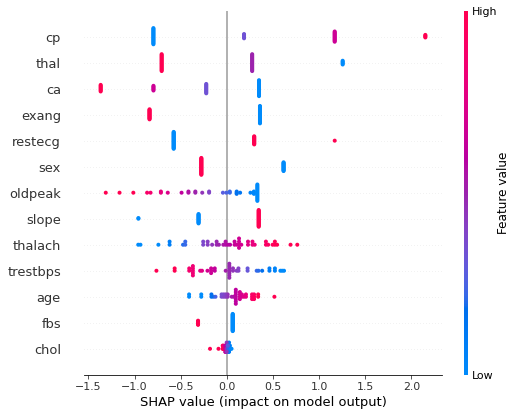

In [112]:
shap.summary_plot(shap_values, X_test)

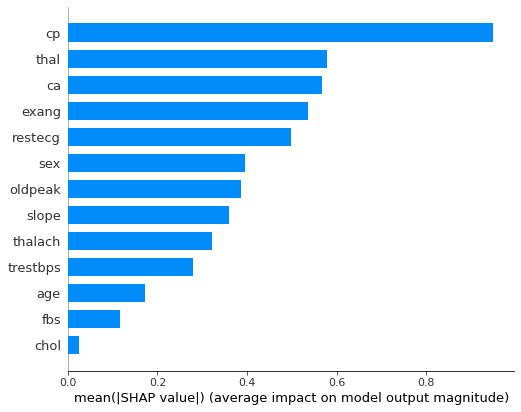

In [113]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Write your inferences from the generated plot.

The plot sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high cp (chest pain type) lowers the predicted patient's present after 1 year.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

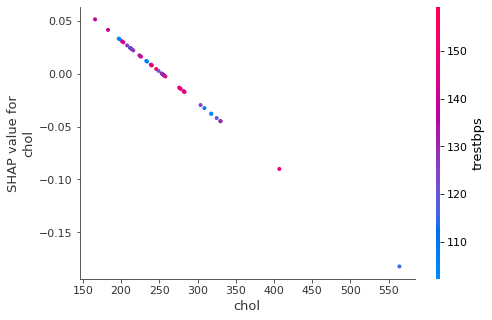

In [117]:
shap.dependence_plot("chol", shap_values, X_test)

## Write your inferences from the generated plot.

Show the effect of a single feature across the whole dataset. In this case chol (serum cholesterol in mg/dl) highlights that the less average number cholesterol per dl blood has more impact for patient present with a high  trestbps (Resting blood pressure (in mm Hg)) value.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

In [101]:
# build a clustering of the features based on shared information about y
clustering = shap.utils.hclust(X_train, y_train)

# above we implicitly used shap.maskers.Independent by passing a raw dataframe as the masker
# now we explicitly use a Partition masker that uses the clustering we just computed
masker = shap.maskers.Partition(X_train, clustering=clustering)

# build a Permutation explainer and explain the model predictions on the given dataset
explainer1 = shap.explainers.Permutation(model.predict_proba, masker)
shap_values2 = explainer1(X_train[:100])

# get just the explanations for the positive class
shap_values2 = shap_values2[...,1]

[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

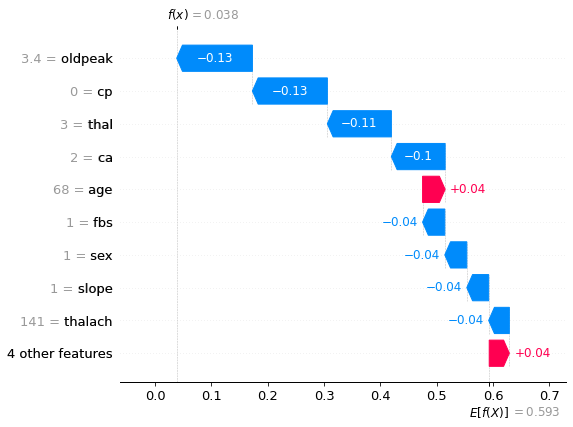

In [99]:
shap.plots.waterfall(shap_values2[0])

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 

In [86]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [87]:
predicted = model.predict(test_data)

In [88]:
predict_file = pd.DataFrame(predicted)
predict_file

,0
0,0
1,0
2,1
3,1
4,1
...,...
86,0
87,1
88,1
89,1


In [89]:
predict_file.value_counts()

1    54
0    37
dtype: int64

In [90]:
predict_file.rename(columns={0: 'prediction'}, inplace=True)
predict_file

,prediction
0,0
1,0
2,1
3,1
4,1
...,...
86,0
87,1
88,1
89,1


In [91]:
predict_file.to_csv('heart_shap.csv', index=False)